## Observations and Insights 

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results)
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Checking the number of mice.
# This is the number of mice with duplicates.
mouse_id_total = merged_data['Mouse ID'].count()
mouse_id_total

1893

In [121]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = merged_data[merged_data.duplicated(subset = ['Mouse ID','Timepoint'], keep=False)]
mouse_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [122]:
# Optional: Get all the data for the duplicate mouse ID. 
# This was done above.

In [123]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = pd.concat([merged_data, mouse_duplicates]).drop_duplicates(keep=False)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [124]:
# Checking the number of mice in the clean DataFrame.

# Checks total number of result entries
total_results = clean_data['Mouse ID'].count()
total_results

1883

## Summary Statistics

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
stdev = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance":variance,
    "StDev":stdev,
    "SEM":sem
})
summary_table

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

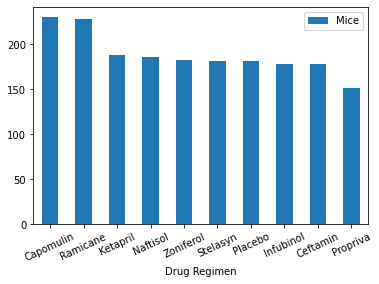

In [172]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment_values = clean_data['Drug Regimen'].value_counts().tolist()
mice_per_treatment_keys = clean_data['Drug Regimen'].value_counts().keys().tolist()
#mice_per_treatment = mice_per_treatment_df.plot.bar(x='Drug Regimen',y='Mouse ID',rot=100)
mice_per_treatment_df = pd.DataFrame({'Drug Regimen':mice_per_treatment_keys,'Mice':mice_per_treatment_values},index=mice_per_treatment_keys)
mice_per_treatment_df.plot.bar(x='Drug Regimen',y='Mice',rot=25)

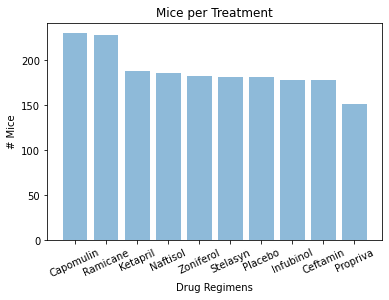

In [167]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_ypos = np.arange(len(mice_per_treatment_values))
plt.bar(mice_ypos,mice_per_treatment_values,align='center',alpha=0.5)
plt.xticks(mice_ypos,mice_per_treatment_keys,rotation=25)
plt.ylabel('# Mice')
plt.xlabel('Drug Regimens')
plt.title('Mice per Treatment')
plt.show()

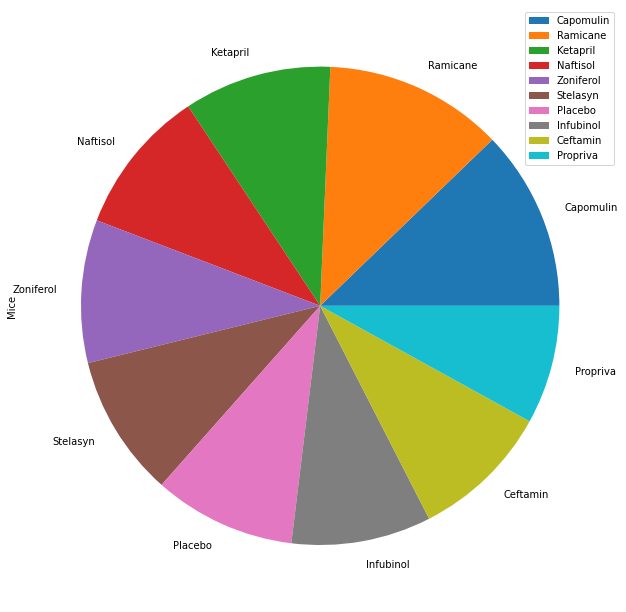

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_per_treatment_df.plot.pie(y="Mice",figsize=(11,11))

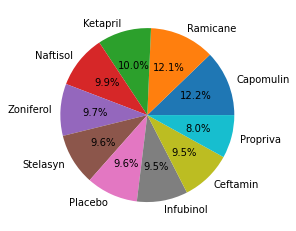

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_per_treatment_values,labels=mice_per_treatment_keys,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [264]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoints_df = clean_data[['Mouse ID','Timepoint']]
timepoints_df2 = timepoints_df.sort_values(by='Timepoint',ascending=False)
mouse_list = timepoints_df2['Mouse ID'].to_list()
mouse_list_keys = timepoints_df2['Mouse ID'].value_counts().keys().to_list()
timepoint_list = timepoints_df2['Timepoint'].to_list()

mlist = []

for m in mouse_list_keys:
    if m not in mlist:
        mlist.append(m)

tplist = []

i=0
while i < len(mlist):
    tplist.append(timepoint_list[i])
    i += 1
    
midtp_df = pd.DataFrame({"Mouse ID":mlist,"Timepoint":tplist})
midtp_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(clean_data,midtp_df,how='inner')
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
137,y769,Ceftamin,Female,6,27,45,68.594745,4
138,y865,Ceftamin,Male,23,26,45,64.729837,3
139,z581,Infubinol,Female,24,25,45,62.754451,3
140,z795,Naftisol,Female,13,29,45,65.741070,3


In [265]:
# Put treatments into a list for for loop (and later for plot labels)

# Unique values were already found with mice_per_treatment_keys above
mice_per_treatment_keys

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Capomulin',
 'Ramicane',
 'Ketapril',
 'Naftisol',
 'Zoniferol',
 'Stelasyn',
 'Placebo',
 'Infubinol',
 'Ceftamin',
 'Propriva']

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
